# College Club Swimming National Qualifying Times Prediction Model
This notebook takes a dictionary input of {Year : NQT String} and returns a plot that predicts the NQTs for the next two years for each event.

In [ ]:
"""
Historical Times for each event
"""

In [1]:
def time_to_seconds(time_str):
    """
    Convert a time string in "MM:SS.MS" or "SS.MS" format to seconds.
    """
    if ':' in time_str:  # Format "MM:SS.MS"
        minutes, rest = time_str.split(':')
        seconds, milliseconds = rest.split('.')
        total_seconds = int(minutes) * 60 + int(seconds) + float(f"0.{milliseconds}")
    else:  # Format "SS.MS"
        seconds, milliseconds = time_str.split('.')
        total_seconds = int(seconds) + float(f"0.{milliseconds}")

    return total_seconds


In [10]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

def predict_qualifying_times(event_name, gender, times_dict):
    """
    Predict qualifying times for the next two years using linear regression, with input times as a dictionary.
    Annotate each point on the graph with its corresponding time. The predicted line starts from the last year in the dictionary.
    """
    # Extract years and times, converting times to seconds
    years = np.array(list(times_dict.keys())).reshape(-1, 1)
    times_seconds = np.array([time_to_seconds(times_dict[year]) for year in times_dict])
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(years, times_seconds)
    
    # Predict for the next two years
    max_year = years.max()
    future_years = np.array([[max_year + 1], [max_year + 2]])
    predictions = model.predict(future_years)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    # Plot historical line
    plt.plot(years, times_seconds, color='blue', label='Historical Times')
    # Plot predicted line starting from the last historical point
    plt.plot([max_year, future_years[0][0], future_years[1][0]], [times_seconds[-1], predictions[0], predictions[1]], color='red', linestyle='--', label='Predicted Times')

    # Plot points and annotate
    plt.scatter(years, times_seconds, color='blue')
    plt.scatter(future_years, predictions, color='red')
    for i, year in enumerate(years.flatten()):
        plt.text(year, times_seconds[i], f"{seconds_to_time(times_seconds[i])}", ha='right', va='bottom')
    for i, year in enumerate(future_years.flatten()):
        plt.text(year, predictions[i], f"{seconds_to_time(predictions[i])}", ha='right', va='bottom')

    plt.title(f'{event_name} - {gender}')
    plt.xlabel('Year')
    plt.ylabel('Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return dict(zip(future_years.flatten(), predictions))

def seconds_to_time(seconds):
    """
    Convert seconds to a string format "MM:SS.MS" or "SS.MS".
    """
    m, s = divmod(seconds, 60)
    ms = round((s - int(s)) * 100)
    if m > 0:
        return f"{int(m):02d}:{int(s):02d}.{ms:02d}"
    else:
        return f"{int(s):02d}.{ms:02d}"


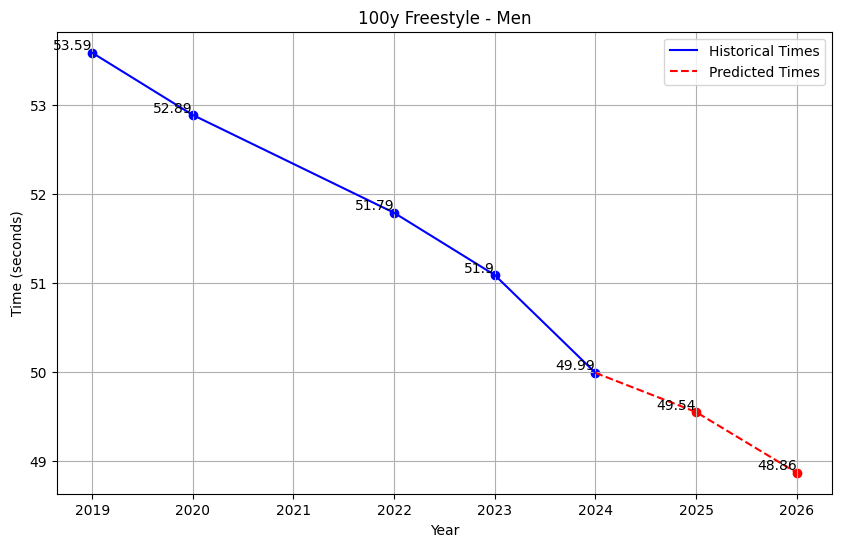

{2025: '49.54', 2026: '48.86'}


In [13]:
event_name = "100y Freestyle"
gender = "Men"
historical_times = {
    2019: "53.59",
    2020: "52.89",
    2022: "51.79",
    2023: "51.09",
    2024: "49.99"
}

predicted_times_dict = predict_qualifying_times(event_name, gender, historical_times)

# Convert the predicted times back to a string format, if needed
def seconds_to_time(seconds):
    m, s = divmod(seconds, 60)
    ms = round((s - int(s)) * 100, 2)
    if m > 0:
        return f"{int(m):02d}:{int(s):02d}.{int(ms)}"
    else:
        return f"{int(s):02d}.{int(ms)}"

predicted_times_str = {year: seconds_to_time(time) for year, time in predicted_times_dict.items()}
print(predicted_times_str)
